In [8]:
import cv2
import numpy as np
from smoothing import gaussian_smoothing_kernel
from sharpening import sharpening_kernel
from convolution import apply_convolution
import matplotlib.pyplot as plt

In [9]:
lena = cv2.imread('./Lena.jpg', 1)

## 2.1: Take an RGB image and apply convolution with each kernel, separately on each channel.


In [10]:
lena_b = lena.copy()
lena_b[:, :, 1] = 0
lena_b[:, :, 2] = 0
print(lena_b.shape)

lena_g = lena.copy()
lena_g[:, :, 0] = 0
lena_g[:, :, 2] = 0
print(lena_g.shape)

lena_r = lena.copy()
lena_r[:, :, 0] = 0
lena_r[:, :, 1] = 0
print(lena_r.shape)


(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


In [ ]:
cv2.imshow("Lena Blue Channel", lena_b)
cv2.imshow("Lena Green Channel", lena_g)
cv2.imshow("Lena Red Channel", lena_r)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
bc, gc, rc = cv2.split(lena)

### Gaussian Smoothing Kernel

In [ ]:
smk = gaussian_smoothing_kernel(5, 1.0)

smooth_bc = apply_convolution(bc, smk)
smooth_gc = apply_convolution(gc, smk)
smooth_rc = apply_convolution(rc, smk)

In [14]:
border_img_bc = smooth_bc["border_image"]
convo_bc = smooth_bc["convo_op"]
norm_bc = smooth_bc["norm"]
norm_cropped_bc = smooth_bc["norm_cropped"]

border_img_gc = smooth_gc["border_image"]
convo_gc = smooth_gc["convo_op"]
norm_gc = smooth_gc["norm"]
norm_cropped_gc = smooth_gc["norm_cropped"]

border_img_rc = smooth_rc["border_image"]
convo_rc = smooth_rc["convo_op"]
norm_rc = smooth_rc["norm"]
norm_cropped_rc = smooth_rc["norm_cropped"]

In [ ]:
cv2.imshow("BC Convo", convo_bc)

cv2.imshow("GC Convo", convo_gc)

cv2.imshow("RC Convo", convo_rc)

cv2.waitKey(0)
cv2.destroyAllWindows()

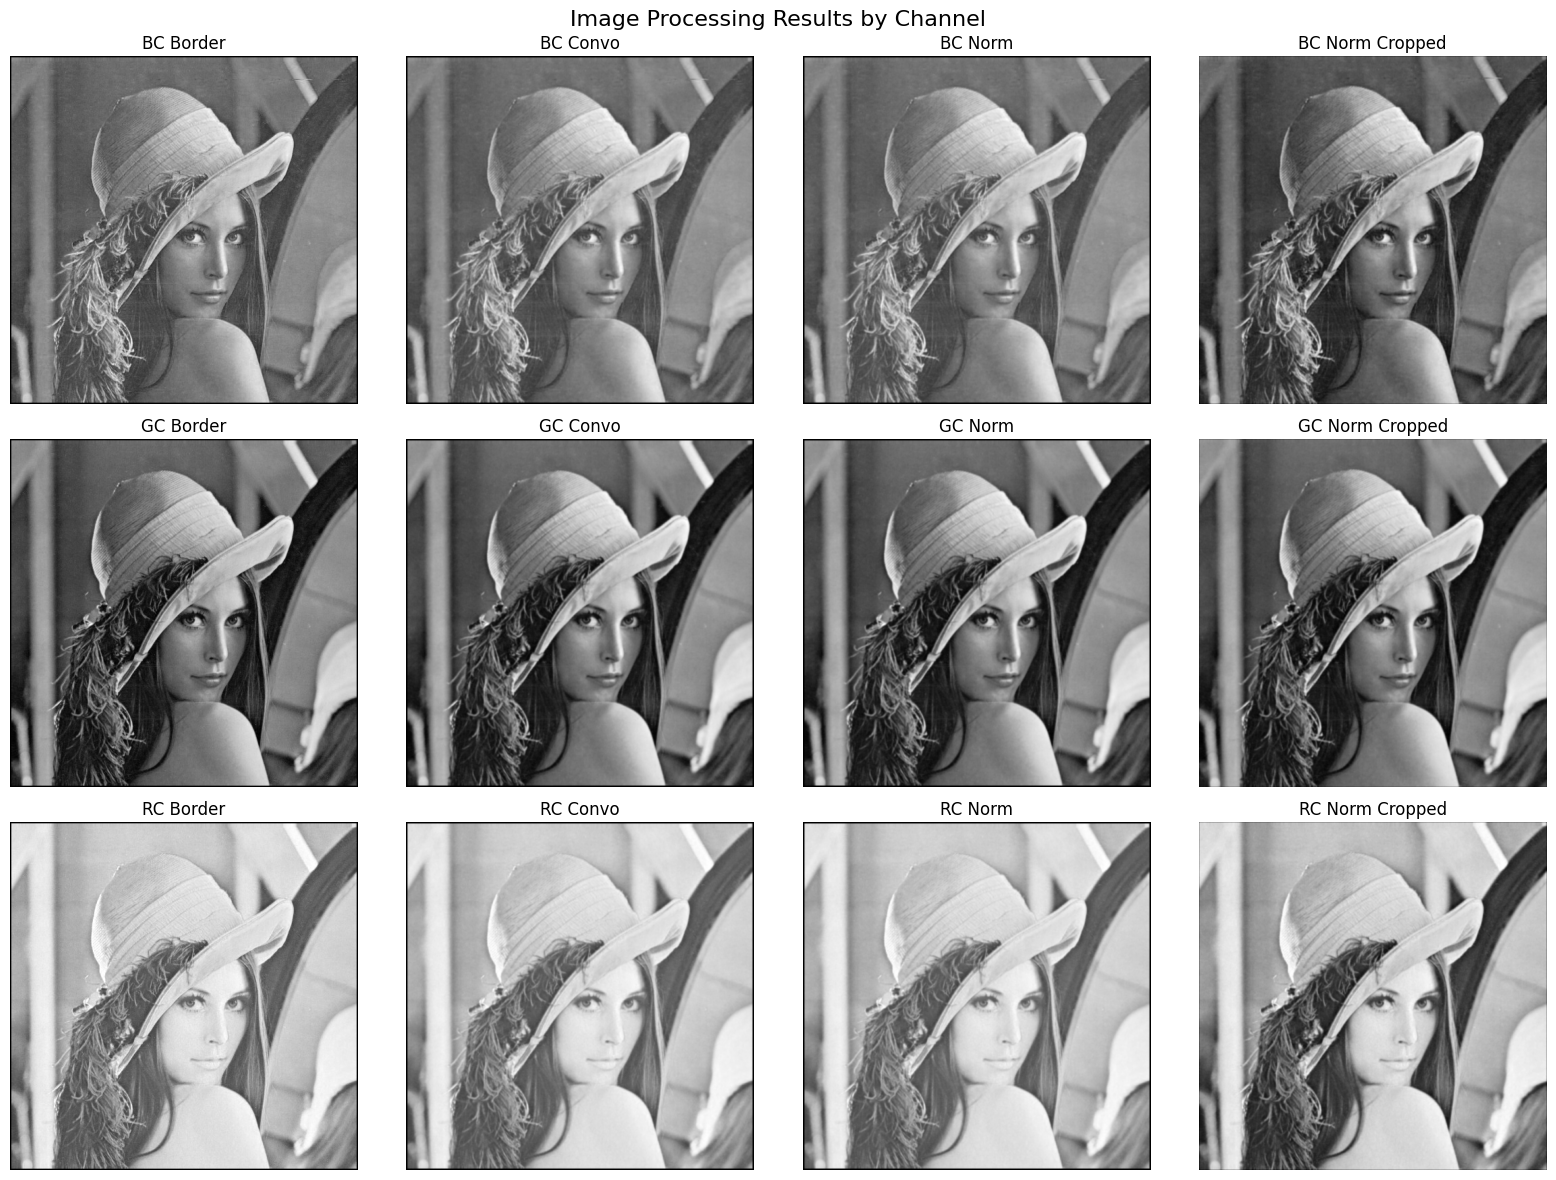

In [16]:
# Create subplots for all images
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
fig.suptitle('Image Processing Results by Channel', fontsize=16)

# Blue Channel row
axes[0, 0].imshow(border_img_bc, cmap='gray')
axes[0, 0].set_title('BC Border')
axes[0, 0].axis('off')

axes[0, 1].imshow(convo_bc, cmap='gray')
axes[0, 1].set_title('BC Convo')
axes[0, 1].axis('off')

axes[0, 2].imshow(norm_bc, cmap='gray')
axes[0, 2].set_title('BC Norm')
axes[0, 2].axis('off')

axes[0, 3].imshow(norm_cropped_bc, cmap='gray')
axes[0, 3].set_title('BC Norm Cropped')
axes[0, 3].axis('off')

# Green Channel row
axes[1, 0].imshow(border_img_gc, cmap='gray')
axes[1, 0].set_title('GC Border')
axes[1, 0].axis('off')

axes[1, 1].imshow(convo_gc, cmap='gray')
axes[1, 1].set_title('GC Convo')
axes[1, 1].axis('off')

axes[1, 2].imshow(norm_gc, cmap='gray')
axes[1, 2].set_title('GC Norm')
axes[1, 2].axis('off')

axes[1, 3].imshow(norm_cropped_gc, cmap='gray')
axes[1, 3].set_title('GC Norm Cropped')
axes[1, 3].axis('off')

# Red Channel row
axes[2, 0].imshow(border_img_rc, cmap='gray')
axes[2, 0].set_title('RC Border')
axes[2, 0].axis('off')

axes[2, 1].imshow(convo_rc, cmap='gray')
axes[2, 1].set_title('RC Convo')
axes[2, 1].axis('off')

axes[2, 2].imshow(norm_rc, cmap='gray')
axes[2, 2].set_title('RC Norm')
axes[2, 2].axis('off')

axes[2, 3].imshow(norm_cropped_rc, cmap='gray')
axes[2, 3].set_title('RC Norm Cropped')
axes[2, 3].axis('off')

plt.tight_layout()
plt.show()

### Gaussian Sharpening (LoG) Kernel

In [18]:
shk = sharpening_kernel(7, 1.0)

sh_bc = apply_convolution(bc, shk)
sh_gc = apply_convolution(gc, shk)
sh_rc = apply_convolution(rc, shk)

In [19]:
border_img_bc = sh_bc["border_image"]
convo_bc = sh_bc["convo_op"]
norm_bc = sh_bc["norm"]
norm_cropped_bc = sh_bc["norm_cropped"]

border_img_gc = sh_gc["border_image"]
convo_gc = sh_gc["convo_op"]
norm_gc = sh_gc["norm"]
norm_cropped_gc = sh_gc["norm_cropped"]

border_img_rc = sh_rc["border_image"]
convo_rc = sh_rc["convo_op"]
norm_rc = sh_rc["norm"]
norm_cropped_rc = sh_rc["norm_cropped"]

In [20]:
cv2.imshow("BC Convo", convo_bc)

cv2.imshow("GC Convo", convo_gc)

cv2.imshow("RC Convo", convo_rc)


cv2.waitKey(0)
cv2.destroyAllWindows()

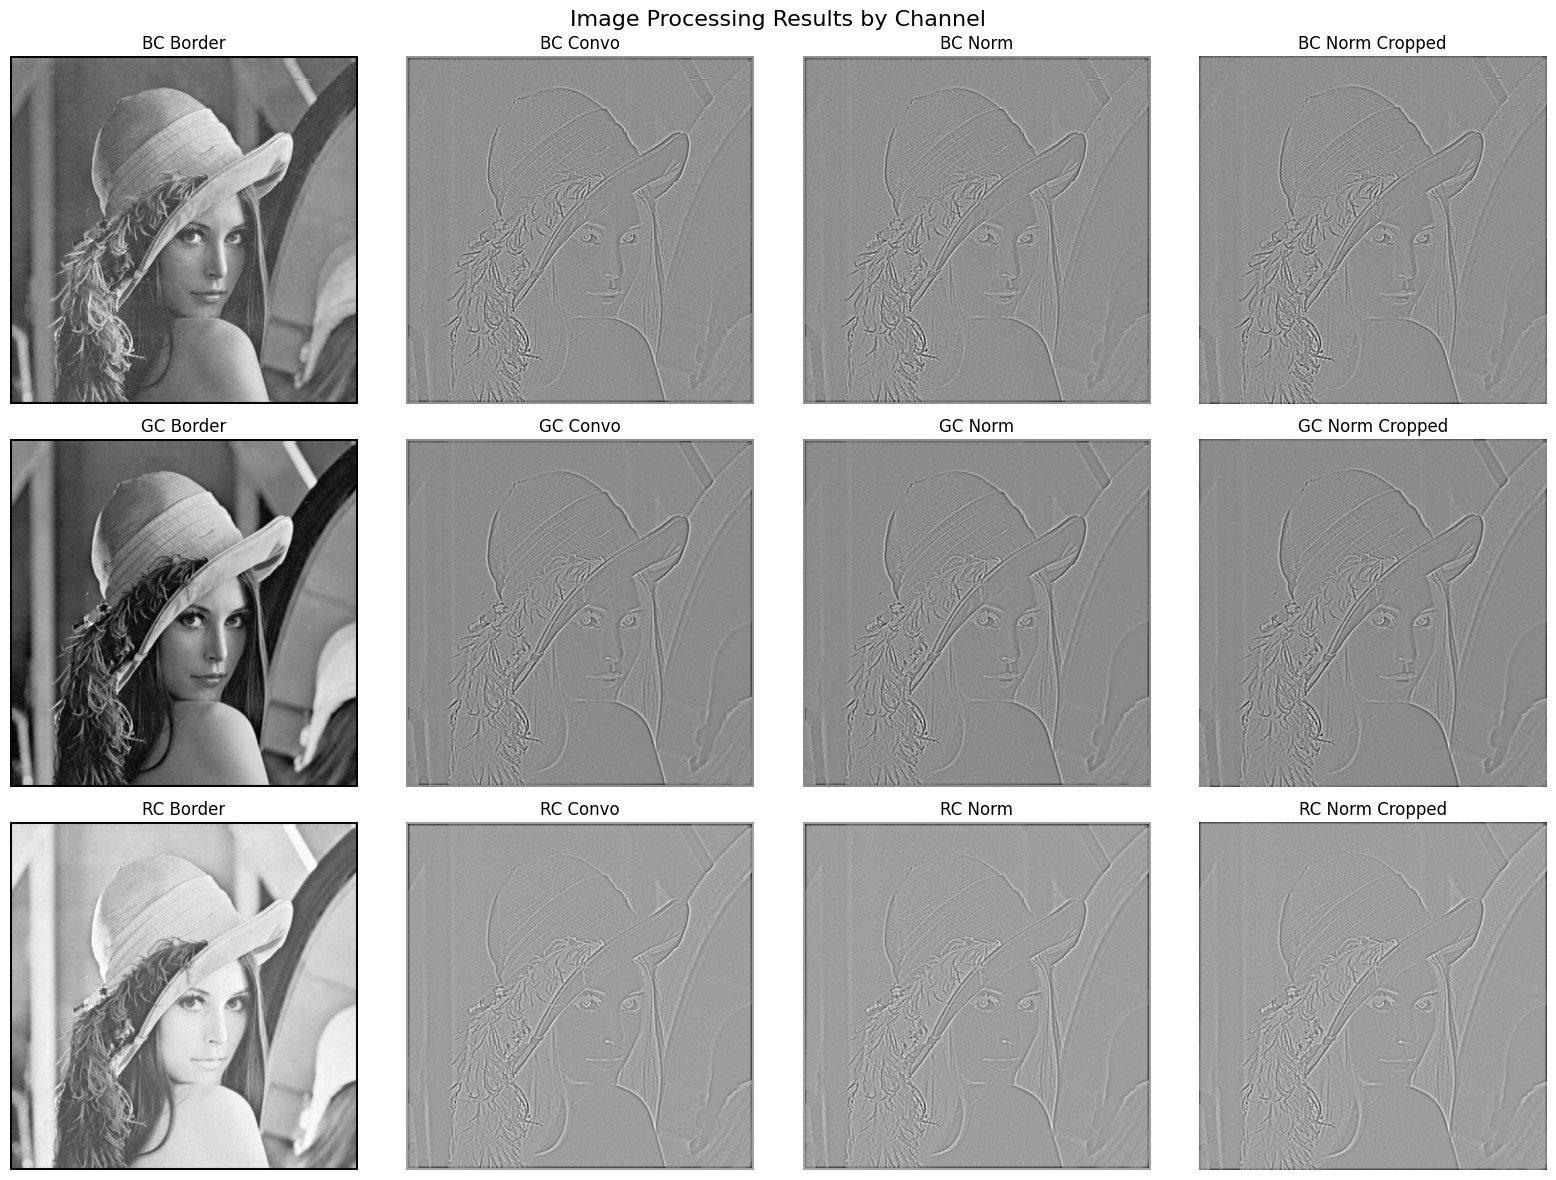

In [21]:
# Create subplots for all images
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
fig.suptitle('Image Processing Results by Channel', fontsize=16)

# Blue Channel row
axes[0, 0].imshow(border_img_bc, cmap='gray')
axes[0, 0].set_title('BC Border')
axes[0, 0].axis('off')

axes[0, 1].imshow(convo_bc, cmap='gray')
axes[0, 1].set_title('BC Convo')
axes[0, 1].axis('off')

axes[0, 2].imshow(norm_bc, cmap='gray')
axes[0, 2].set_title('BC Norm')
axes[0, 2].axis('off')

axes[0, 3].imshow(norm_cropped_bc, cmap='gray')
axes[0, 3].set_title('BC Norm Cropped')
axes[0, 3].axis('off')

# Green Channel row
axes[1, 0].imshow(border_img_gc, cmap='gray')
axes[1, 0].set_title('GC Border')
axes[1, 0].axis('off')

axes[1, 1].imshow(convo_gc, cmap='gray')
axes[1, 1].set_title('GC Convo')
axes[1, 1].axis('off')

axes[1, 2].imshow(norm_gc, cmap='gray')
axes[1, 2].set_title('GC Norm')
axes[1, 2].axis('off')

axes[1, 3].imshow(norm_cropped_gc, cmap='gray')
axes[1, 3].set_title('GC Norm Cropped')
axes[1, 3].axis('off')

# Red Channel row
axes[2, 0].imshow(border_img_rc, cmap='gray')
axes[2, 0].set_title('RC Border')
axes[2, 0].axis('off')

axes[2, 1].imshow(convo_rc, cmap='gray')
axes[2, 1].set_title('RC Convo')
axes[2, 1].axis('off')

axes[2, 2].imshow(norm_rc, cmap='gray')
axes[2, 2].set_title('RC Norm')
axes[2, 2].axis('off')

axes[2, 3].imshow(norm_cropped_rc, cmap='gray')
axes[2, 3].set_title('RC Norm Cropped')
axes[2, 3].axis('off')

plt.tight_layout()
plt.show()